In [ ]:
from sympy import solve, symbols
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.optimize

In [ ]:
L3 = 2.0633e-2
L6 = 2.5467e-2
L12 = 3.1100e-2

In [ ]:
l3, l6, x = symbols('L3 L6 x')
solve((1 + 0.5*l6) - (1 + 0.25*l3)*(1 + 0.25*x), x)

[4.0*(-L3 + 2.0*L6)/(L3 + 4.0)]

In [ ]:
L_3_6 = 4.0*(-L3 + 2.0*L6)/(L3 + 4.0)

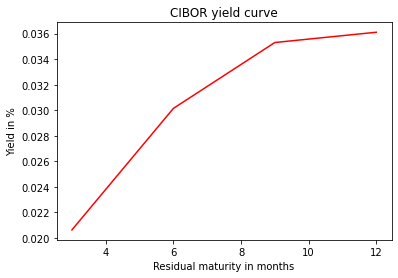

In [ ]:
def implyD12(L3, L_3_6, x):
    f = scipy.interpolate.interp1d([3,6,12], [L3,L_3_6,x], 'quadratic')
    L_6_9 = f(9)
    D3 = 1/(1 + 0.25*L3)
    D6 = D3/(1 + 0.25*L_3_6)
    D9 = D6/(1 + 0.25*x)
    D12 = D9/(1 + 0.25*x)
    return D12

D12 = 1 / (1 + L12)
L_9_12 = scipy.optimize.broyden1(lambda x: implyD12(L3,L_3_6,x) - D12, 1.0, f_tol=1e-6)
f = scipy.interpolate.interp1d([3,6,12], [L3,L_3_6,L_9_12], 'quadratic')
tenors1Y = [3,6,9,12]
curve1Y = f(tenors1Y)

plt.plot(tenors1Y, curve1Y, c = "r")
plt.title("CIBOR yield curve")
plt.xlabel("Residual maturity in months")
plt.ylabel("Yield in %")
plt.show()